In [2]:
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob
import pyemma

In [7]:
#### APO variants ####

directo= '/Users/Nia/Documents/PhD/KE_MD/HGs_MD/TRAJS/'
trajfiles_HG3_apo=[fi for fi in glob.glob(directo + 'HG3_APO/'+ '*super.dcd')]
topfile_HG3_apo= directo + 'TOPS/hg3_apo.pdb'


trajfiles_HG317shell_apo=[fi for fi in glob.glob(directo +'HG317shell_APO/'+  '*super.dcd')]
topfile_HG317shell_apo= directo+'/TOPS/hg317_shell_apo_aligned.pdb'



trajfiles_HG4_apo=[fi for fi in glob.glob(directo + 'HG4_APO/'+ '*super.dcd')]
topfile_HG4_apo=directo+'/TOPS/hg4_apo_aligned.pdb'

trajfiles_HG317_apo=[fi for fi in glob.glob(directo + 'HG317_APO/'+ '*super.dcd')]
topfile_HG317_apo=directo+'/TOPS/hg317_apo_aligned.pdb'


In [8]:
trajfiles = []
trajfiles.append(trajfiles_HG3_apo)
trajfiles.append(trajfiles_HG317shell_apo)
trajfiles.append(trajfiles_HG4_apo)
trajfiles.append(trajfiles_HG317_apo)

                 
topfiles = []
topfiles.append(topfile_HG3_apo)
topfiles.append(topfile_HG317shell_apo)
topfiles.append(topfile_HG4_apo)
topfiles.append(topfile_HG317_apo)




# Rename the top and traj files

In [9]:
Designed_APO = pt.iterload(trajfiles[0] , top=topfiles[0])
Shell_APO = pt.iterload(trajfiles[1] , top=topfiles[1])
Core_APO = pt.iterload(trajfiles[2] , top=topfiles[2])
Evolved_APO = pt.iterload(trajfiles[3] , top=topfiles[3])



In [11]:
# First let's plot the CA RMSD values per time
D_APO_RMSD = pt.rmsd(Designed_APO,mask='@CA')
S_APO_RMSD = pt.rmsd(Shell_APO,mask='@CA')
C_APO_RMSD = pt.rmsd(Core_APO,mask='@CA')
E_APO_RMSD = pt.rmsd(Evolved_APO,mask='@CA')

D_APO_RMSD = np.hstack(D_APO_RMSD)
S_APO_RMSD = np.hstack(S_APO_RMSD)
C_APO_RMSD = np.hstack(C_APO_RMSD)
E_APO_RMSD = np.hstack(E_APO_RMSD)





In [12]:
#Split distances by replica
D_APO_RMSD_1= D_APO_RMSD[0:102000]
D_APO_RMSD_2= D_APO_RMSD[102000:204000]
D_APO_RMSD_3= D_APO_RMSD[204000:306000]
std_D_apo_rmsd=[np.std(i) for i in list(zip(D_APO_RMSD_1,D_APO_RMSD_2,D_APO_RMSD_3))]
mean_D_apo_rmsd =[np.mean(i) for i in list(zip(D_APO_RMSD_1,D_APO_RMSD_2,D_APO_RMSD_3))]


C_APO_RMSD_1= C_APO_RMSD[0:102000]
C_APO_RMSD_2= C_APO_RMSD[102000:204000]
C_APO_RMSD_3= C_APO_RMSD[204000:306000]
std_C_apo_rmsd=[np.std(i) for i in list(zip(C_APO_RMSD_1,C_APO_RMSD_2,C_APO_RMSD_3))]
mean_C_apo_rmsd =[np.mean(i) for i in list(zip(C_APO_RMSD_1,C_APO_RMSD_2,C_APO_RMSD_3))]


E_APO_RMSD_1= E_APO_RMSD[0:102000]
E_APO_RMSD_2= E_APO_RMSD[102000:204000]
E_APO_RMSD_3= E_APO_RMSD[204000:306000]
std_E_apo_rmsd=[np.std(i) for i in list(zip(E_APO_RMSD_1,E_APO_RMSD_2,E_APO_RMSD_3))]
mean_E_apo_rmsd =[np.mean(i) for i in list(zip(E_APO_RMSD_1,E_APO_RMSD_2,E_APO_RMSD_3))]

S_APO_RMSD_1= S_APO_RMSD[0:102000]
S_APO_RMSD_2= S_APO_RMSD[102000:204000]
S_APO_RMSD_3= S_APO_RMSD[204000:306000]
std_S_apo_rmsd=[np.std(i) for i in list(zip(S_APO_RMSD_1,S_APO_RMSD_2,S_APO_RMSD_3))]
mean_S_apo_rmsd =[np.mean(i) for i in list(zip(S_APO_RMSD_1,S_APO_RMSD_2,S_APO_RMSD_3))]



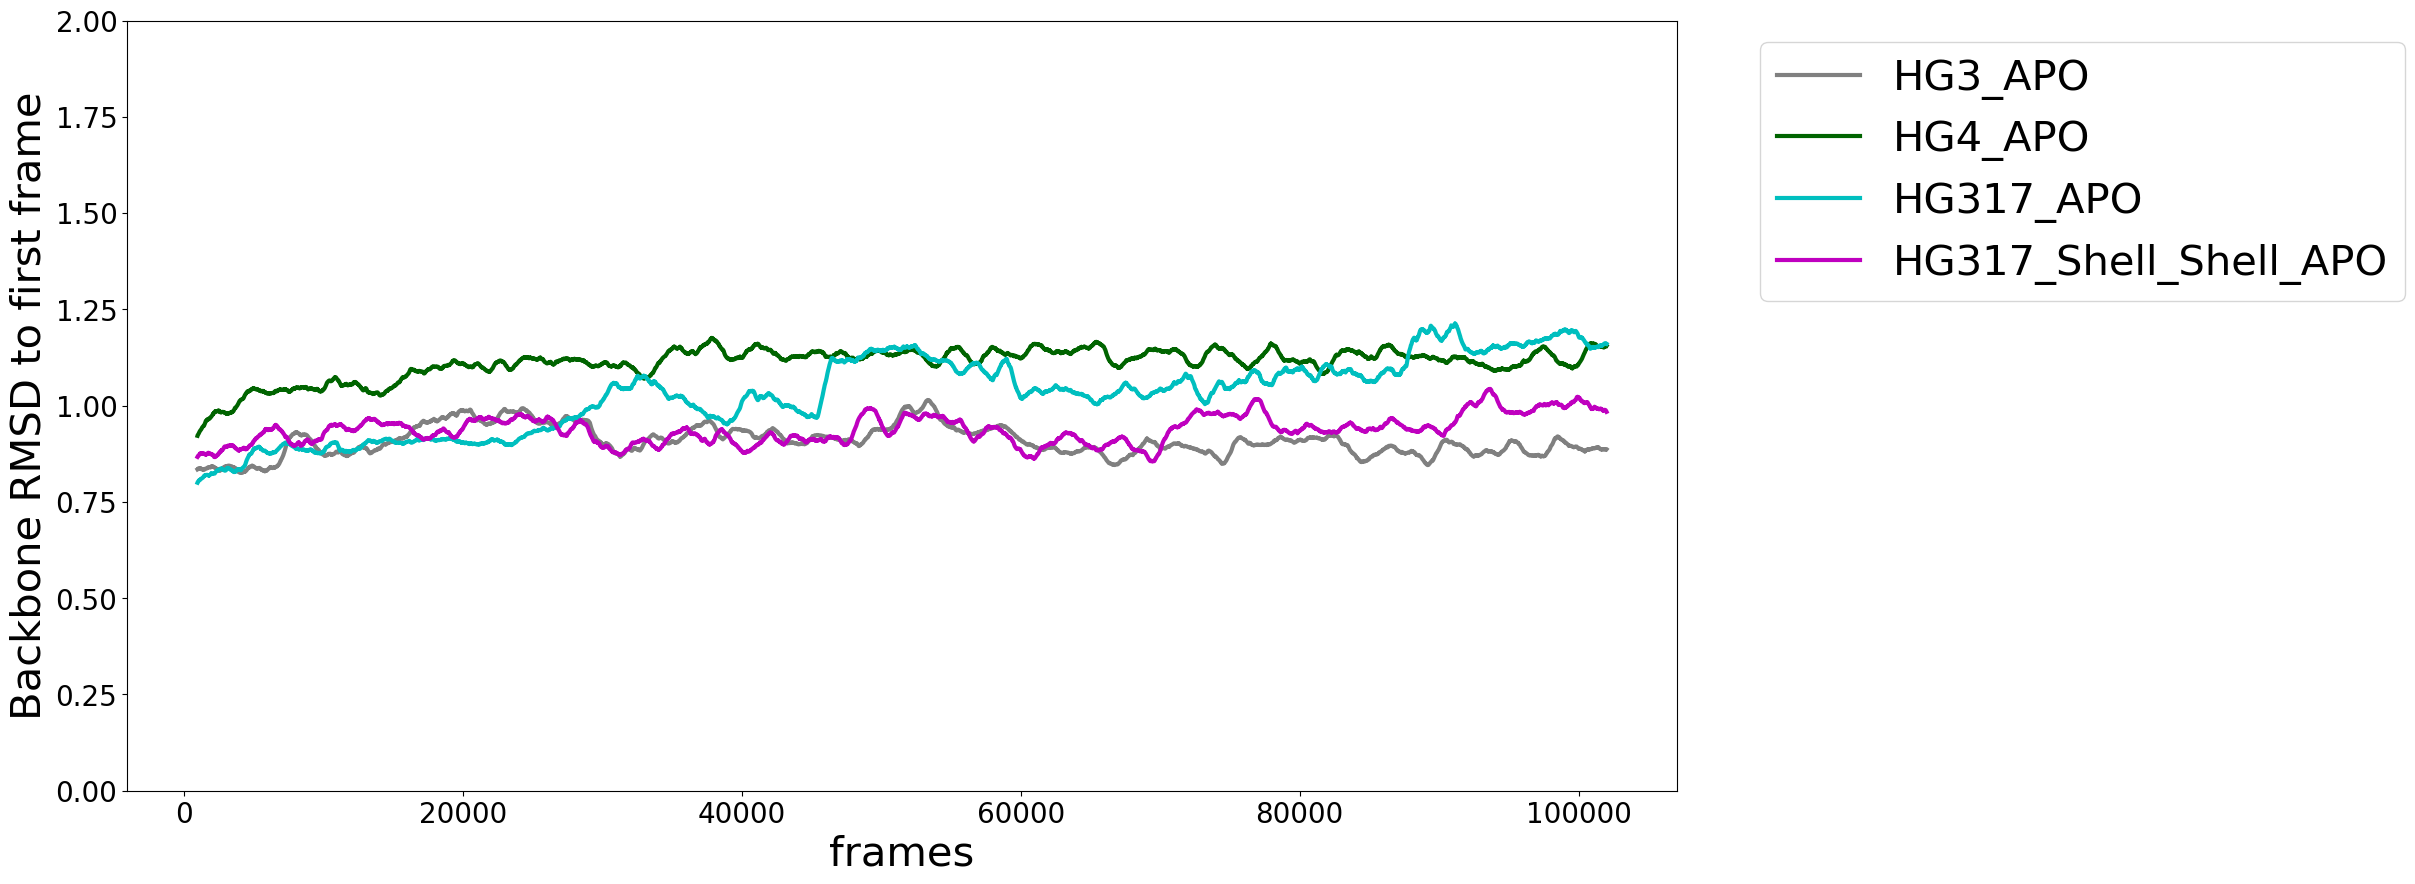

In [19]:
plt.figure(figsize=(20,10))
plt.xlabel('frames',fontsize=30)
plt.ylabel('Backbone RMSD to first frame',fontsize=30)
plt.plot(pd.Series(mean_D_apo_rmsd).rolling(1000).mean(),color="gray", linewidth=3, label='HG3_APO')
plt.plot(pd.Series(mean_C_apo_rmsd).rolling(1000).mean(),color="darkgreen", linewidth=3, label='HG4_APO')
plt.plot(pd.Series(mean_E_apo_rmsd).rolling(1000).mean(),color="c", linewidth=3, label='HG317_APO')
plt.plot(pd.Series(mean_S_apo_rmsd).rolling(1000).mean(),color="m", linewidth=3, label='HG317_Shell_Shell_APO')
plt.ylim(0,2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left",fontsize=30)




In [6]:
# now let's plot the RMSF per residue
D_APO_RMSF = pt.rmsf(Designed_APO,mask='@CA,C,N,O',options='byres')
C_APO_RMSF = pt.rmsf(Core_APO,mask='@CA,C,N,O',options='byres')
E_APO_RMSF = pt.rmsf(Evolved_APO,mask='@CA,C,N,O',options='byres')
S_APO_RMSF = pt.rmsf(Shell_APO,mask='@CA,C,N,O',options='byres')


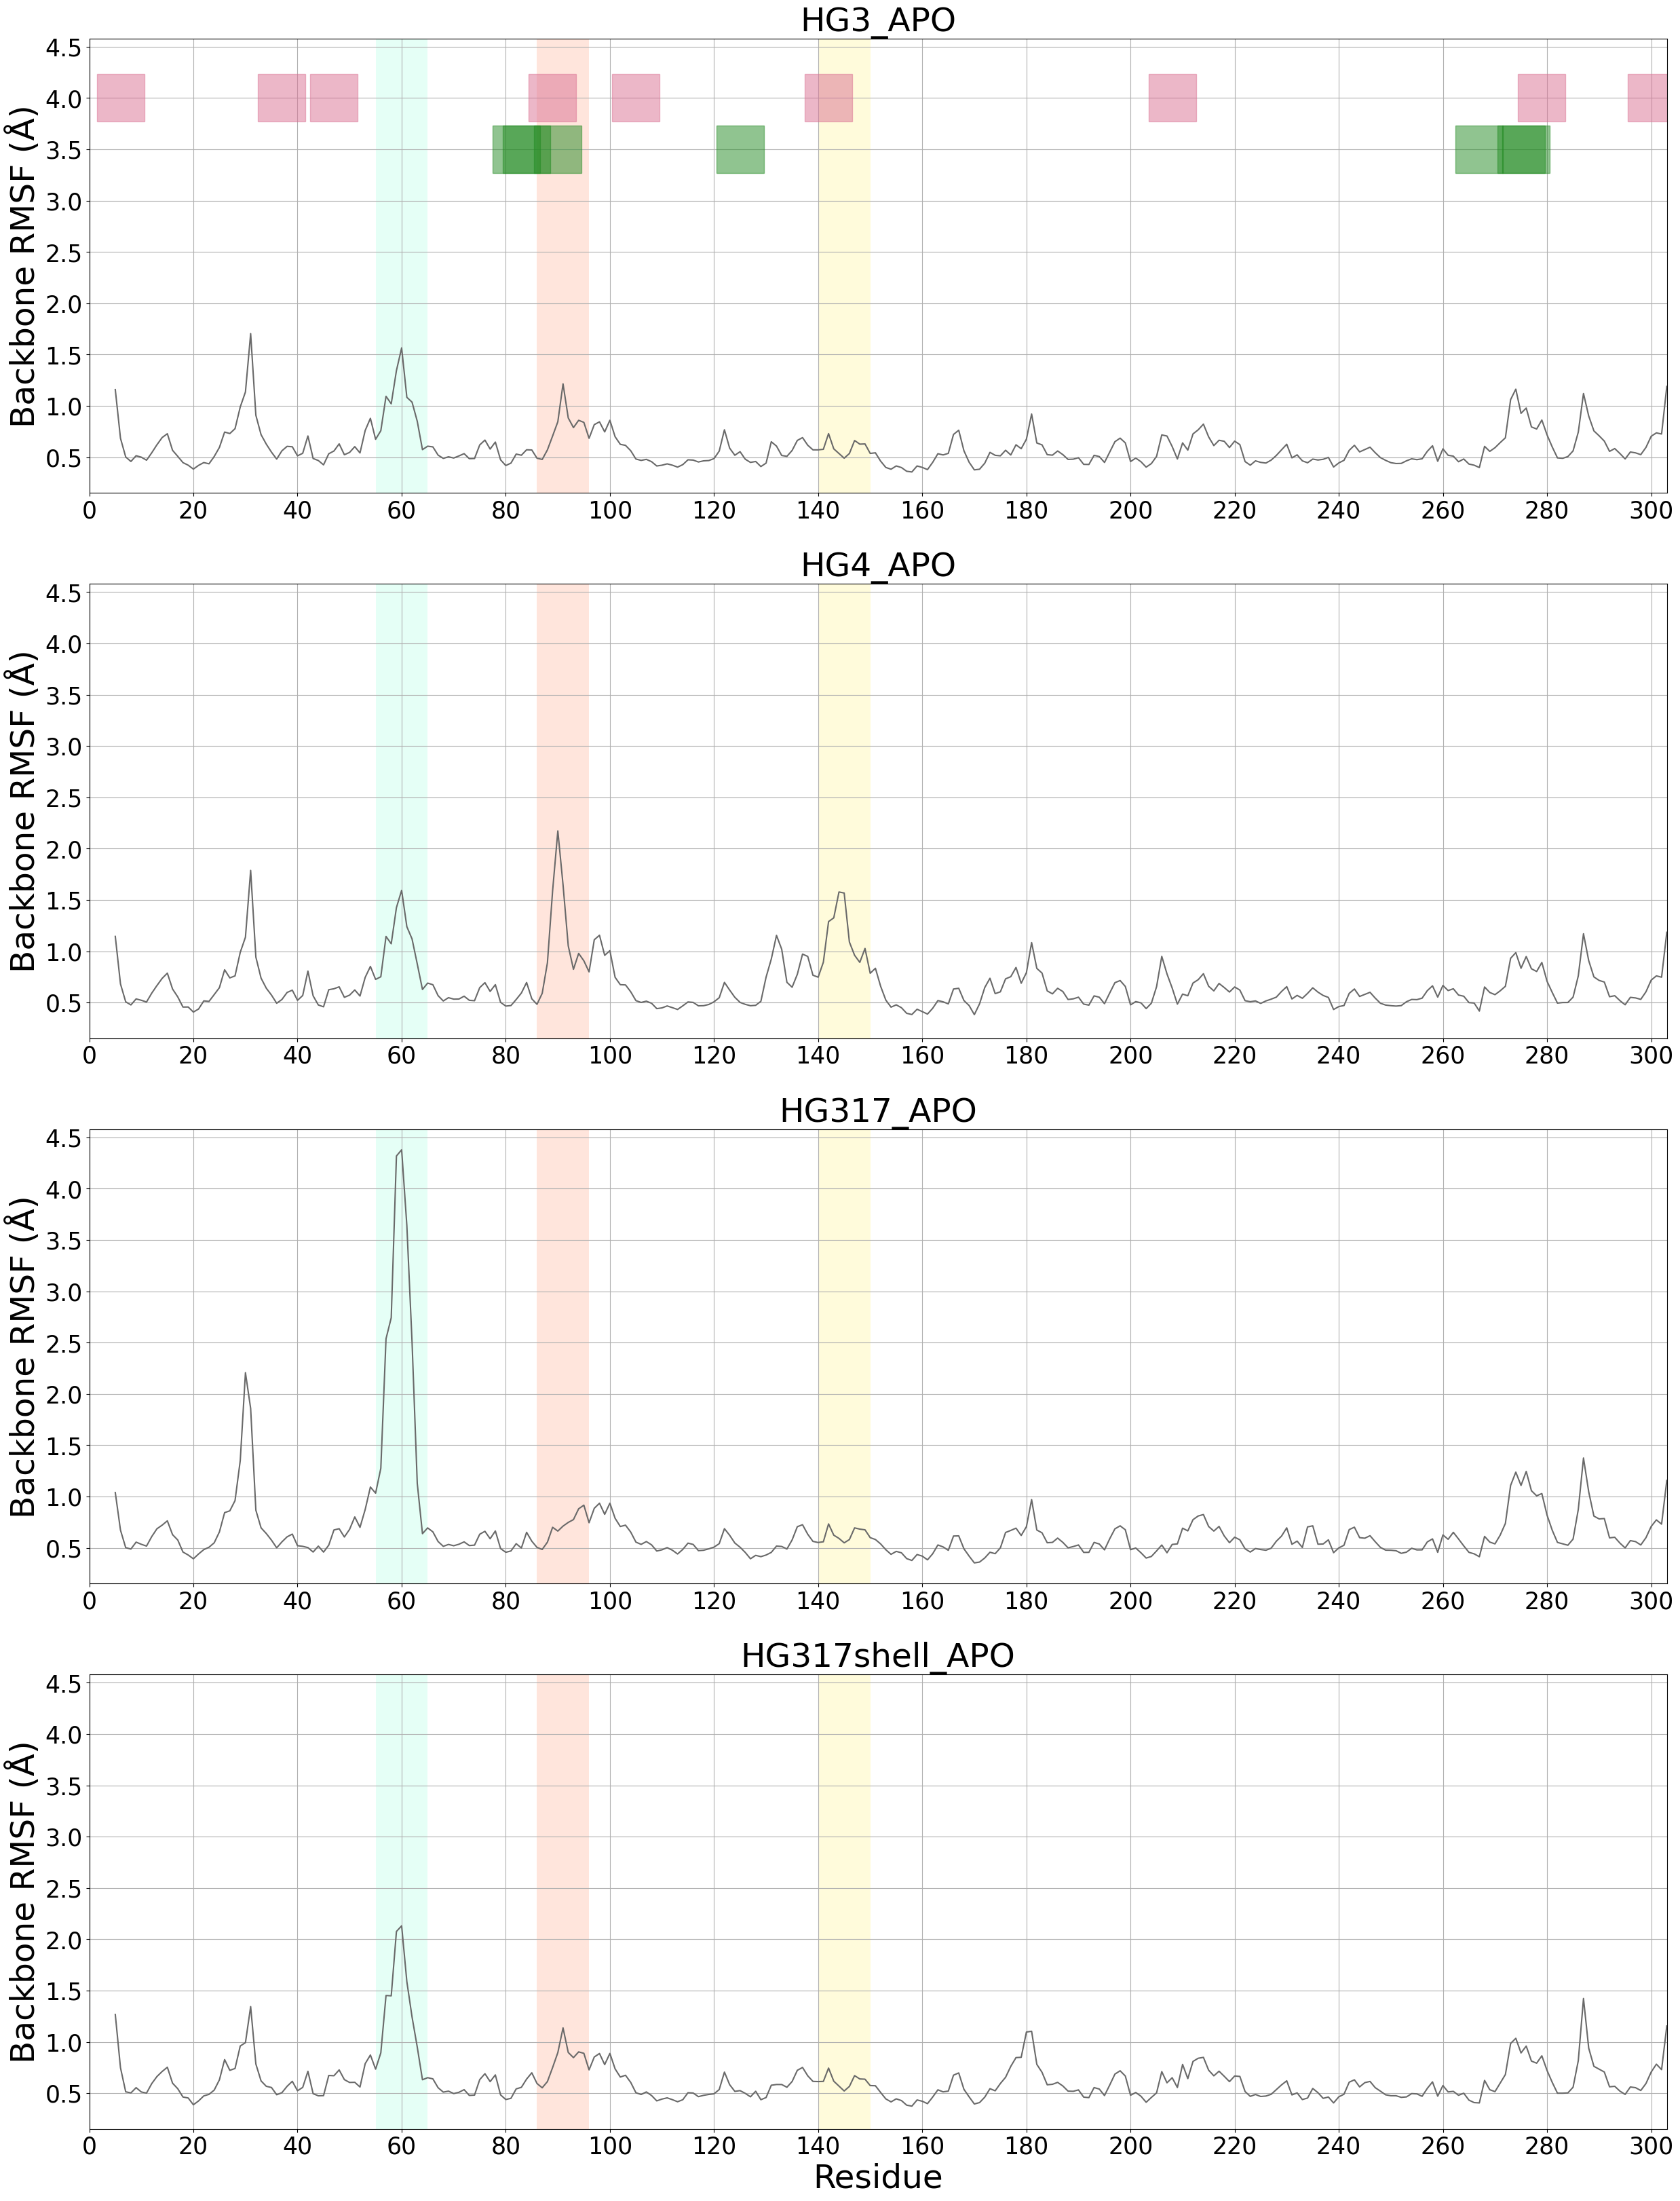

In [78]:
# Plot
# I fixed the numbering issue by adding 3 to each residue number

fig, [ax1,ax2,ax3,ax4] = plt.subplots(4,figsize=(30,40), sharey=True)

ax1.plot(D_APO_RMSF[:,0]+4,D_APO_RMSF[:,1], color='dimgrey')
ax2.plot(D_APO_RMSF[:,0]+4,C_APO_RMSF[:,1], color='dimgrey')
ax3.plot(D_APO_RMSF[:,0]+4,E_APO_RMSF[:,1], color='dimgrey')
ax4.plot(D_APO_RMSF[:,0]+4,S_APO_RMSF[:,1], color='dimgrey')

ax1.set_xlim(4,303)
ax2.set_xlim(4,303)
ax3.set_xlim(4,303)
ax4.set_xlim(4,303)

xticks = np.arange(0,301, 20)
ax1.set_xticks(xticks)
ax2.set_xticks(xticks)
ax3.set_xticks(xticks)
ax4.set_xticks(xticks)


ax1.set_title('HG3_APO', fontsize=35)
ax2.set_title('HG4_APO', fontsize=35)
ax3.set_title('HG317_APO', fontsize=35)
ax4.set_title('HG317shell_APO', fontsize=35)

ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax4.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_ylabel('Backbone RMSF (Å)', fontsize=35)    
ax2.set_ylabel('Backbone RMSF (Å)', fontsize=35)    
ax3.set_ylabel('Backbone RMSF (Å)', fontsize=35)    
ax4.set_ylabel('Backbone RMSF (Å)', fontsize=35)    

ax4.set_xlabel('Residue', fontsize=35)
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax1.axvspan(55, 65, facecolor='aquamarine', alpha=0.2)
ax1.axvspan(86, 96, facecolor='coral', alpha=0.2)
ax1.axvspan(140, 150, facecolor='lemonchiffon', alpha=0.7)

ax2.axvspan(55, 65, facecolor='aquamarine', alpha=0.2)
ax2.axvspan(86, 96, facecolor='coral', alpha=0.2)
ax2.axvspan(140, 150, facecolor='lemonchiffon', alpha=0.7)

ax3.axvspan(55, 65, facecolor='aquamarine', alpha=0.2)
ax3.axvspan(86, 96, facecolor='coral', alpha=0.2)
ax3.axvspan(140, 150, facecolor='lemonchiffon', alpha=0.7)

ax4.axvspan(55, 65, facecolor='aquamarine', alpha=0.2)
ax4.axvspan(86, 96, facecolor='coral', alpha=0.2)
ax4.axvspan(140, 150, facecolor='lemonchiffon', alpha=0.7)

shell_mutations=[6,37,47,89,105,142,208,279,300]
core_mutations=[82,84,90,125,267,275,276]

for mut in shell_mutations:
    ax1.plot(mut,4,'s',c='palevioletred',ms=50,alpha=0.5)

     
    
for mut in core_mutations:
    ax1.plot(mut,3.5,'s',c='forestgreen',ms=50,alpha=0.5)





In [98]:
frame_indices=list(range(0,300001,1000))
print(frame_indices)

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 

In [99]:
# now let's compute pairwise backbone RMSDs
D_APO_pairwise_rmsd = pt.pairwise_rmsd(Designed_APO,mask='@CA,C,N,O',frame_indices=frame_indices)
C_APO_pairwise_rmsd = pt.pairwise_rmsd(Core_APO,mask='@CA,C,N,O',frame_indices=frame_indices)
E_APO_pairwise_rmsd = pt.pairwise_rmsd(Evolved_APO,mask='@CA,C,N,O',frame_indices=frame_indices)
S_APO_pairwise_rmsd = pt.pairwise_rmsd(Shell_APO,mask='@CA,C,N,O',frame_indices=frame_indices)


In [100]:
cmap = plt.get_cmap('PRGn')

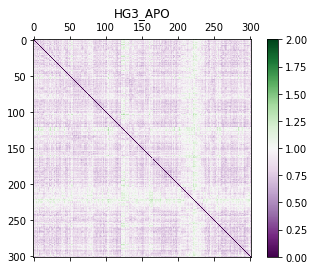

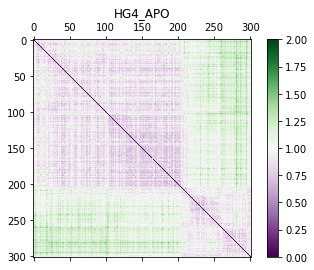

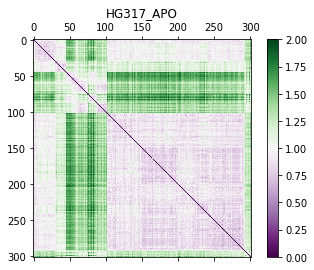

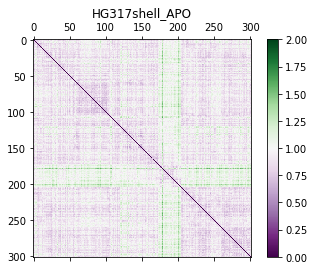

In [105]:
figure = plt.figure()
axes = figure.add_subplot(111)
D_APO_pairwise = axes.matshow(D_APO_pairwise_rmsd, interpolation ='nearest',vmin=0,vmax=2,cmap=cmap)
figure.colorbar(D_APO_pairwise)
plt.title("HG3_APO")
plt.show()

figure = plt.figure()
axes = figure.add_subplot(111)
C_APO_pairwise = axes.matshow(C_APO_pairwise_rmsd, interpolation ='nearest',vmin=0,vmax=2,cmap=cmap)
figure.colorbar(C_APO_pairwise)
plt.title("HG4_APO")
plt.show()

figure = plt.figure()
axes = figure.add_subplot(111)
E_APO_pairwise = axes.matshow(E_APO_pairwise_rmsd, interpolation ='nearest',vmin=0,vmax=2,cmap=cmap)
figure.colorbar(E_APO_pairwise)
plt.title("HG317_APO")
plt.show()

figure = plt.figure()
axes = figure.add_subplot(111)
S_APO_pairwise = axes.matshow(S_APO_pairwise_rmsd, interpolation ='nearest',vmin=0,vmax=2,cmap=cmap)
figure.colorbar(S_APO_pairwise)
plt.title("HG317shell_APO")
plt.show()

In [5]:
def convert_chi(chi): 
    if chi == "None": 
        return(chi) 
    else: 
        x = float(chi)
        y=0.0
        if 0 <= x < 90: 
            y = 180 - x 
        elif 90 <= x <= 180: 
            y = x
        elif -90 <= x < 0: 
            y = x + 180
        elif -180 <= x < -90: 
            y = abs(x) 
        #print(chi, y)
        return(y)


In [6]:
# Let's look at the catalytic residues ASP127 and GLU50 dihehdrals pertime
D_APO_dihedral_127 = pt.dihedral(Designed_APO,mask=':124@N :124@CA :124@CB :124@CG')
C_APO_dihedral_127 = pt.dihedral(Core_APO,mask=':124@N :124@CA :124@CB :124@CG ')
E_APO_dihedral_127 = pt.dihedral(Evolved_APO,mask=':124@N :124@CA :124@CB :124@CG')
S_APO_dihedral_127 = pt.dihedral(Shell_APO,mask=':124@N :124@CA :124@CB :124@CG')


D_APO_dihedral_127 = np.hstack(D_APO_dihedral_127)
C_APO_dihedral_127 = np.hstack(C_APO_dihedral_127)
E_APO_dihedral_127 = np.hstack(E_APO_dihedral_127)
S_APO_dihedral_127 = np.hstack(S_APO_dihedral_127)


In [19]:
D_APO_dihedral_127_corr = [convert_chi(x) for x in D_APO_dihedral_127]
C_APO_dihedral_127_corr = [convert_chi(x) for x in C_APO_dihedral_127]
E_APO_dihedral_127_corr = [convert_chi(x) for x in E_APO_dihedral_127]
S_APO_dihedral_127_corr = [convert_chi(x) for x in S_APO_dihedral_127]


(array([35., 28., 23., ...,  1.,  2.,  2.]),
 array([ 90.00023966,  90.09022823,  90.18021681, ..., 179.80883661,
        179.89882518, 179.98881376]),
 [<matplotlib.patches.Polygon at 0x7fc61543d250>])

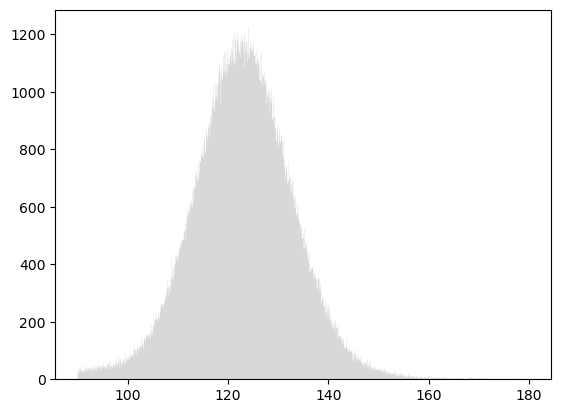

In [64]:
plt.hist(D_APO_dihedral_127_corr, color='gray',edgecolor=None, bins=1000,alpha=0.3, label='D374', histtype='stepfilled')
#plt.hist(C_APO_dihedral_127_1, color='darkgreen',edgecolor=None, bins=1000,alpha=0.3, label='D374', histtype='stepfilled')
#plt.hist(E_APO_dihedral_127_1, color='c',edgecolor=None, bins=1000,alpha=0.3, label='D374', histtype='stepfilled')
#plt.hist(S_APO_dihedral_127_1, color='m',edgecolor=None, bins=1000,alpha=0.3, label='D374', histtype='stepfilled')

In [16]:
# Let's look at the catalytic residues ASP127 and GLU50 dihehdrals pertime
D_APO_dihedral2_127 = pt.dihedral(Designed_APO,mask=':124@CA :124@CB :124@CG :124@OD1')
C_APO_dihedral2_127 = pt.dihedral(Core_APO,mask=':124@CA :124@CB :124@CG  :124@OD1')
E_APO_dihedral2_127 = pt.dihedral(Evolved_APO,mask=':124@CA :124@CB :124@CG :124@OD1')
S_APO_dihedral2_127 = pt.dihedral(Shell_APO,mask=':124@CA :124@CB :124@CG :124@OD1')


D_APO_dihedral2_127 = np.hstack(D_APO_dihedral2_127)
C_APO_dihedral2_127 = np.hstack(C_APO_dihedral2_127)
E_APO_dihedral2_127 = np.hstack(E_APO_dihedral2_127)
S_APO_dihedral2_127 = np.hstack(S_APO_dihedral2_127)

D_APO_dihedral2_127_corr = [convert_chi(x) for x in D_APO_dihedral2_127]
C_APO_dihedral2_127_corr = [convert_chi(x) for x in C_APO_dihedral2_127]
E_APO_dihedral2_127_corr = [convert_chi(x) for x in E_APO_dihedral2_127]
S_APO_dihedral2_127_corr = [convert_chi(x) for x in S_APO_dihedral2_127]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7fc60120de20>})

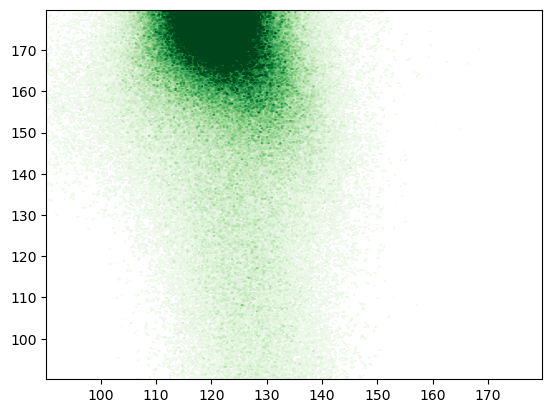

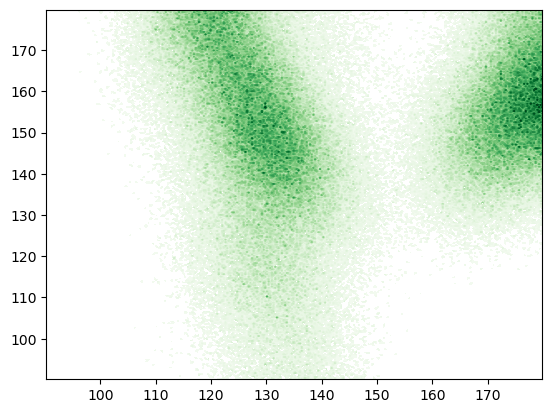

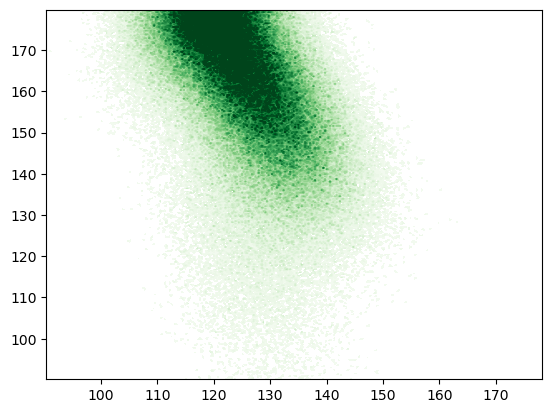

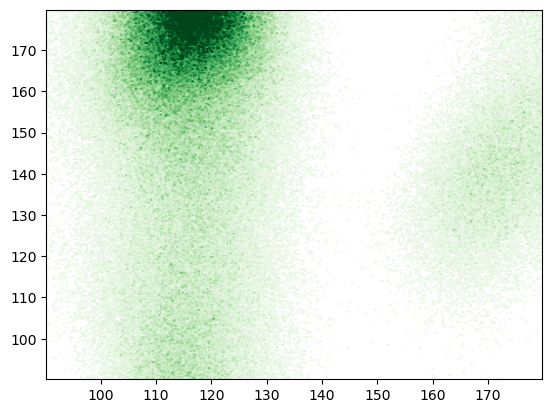

In [62]:
pyemma.plots.plot_density(D_APO_dihedral_127_corr,D_APO_dihedral2_127_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(C_APO_dihedral_127_corr,C_APO_dihedral2_127_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(E_APO_dihedral_127_corr,E_APO_dihedral2_127_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(S_APO_dihedral_127_corr,S_APO_dihedral2_127_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)


In [65]:
D_APO_dihedral_50 = pt.dihedral(Designed_APO,mask=':47@N :47@CA :47@CB :47@CG')
C_APO_dihedral_50 = pt.dihedral(Core_APO,mask=':47@N :47@CA :47@CB :47@CG ')
E_APO_dihedral_50 = pt.dihedral(Evolved_APO,mask=':47@N :47@CA :47@CB :47@CG')
S_APO_dihedral_50 = pt.dihedral(Shell_APO,mask=':47@N :47@CA :47@CB :47@CG')


D_APO_dihedral_50 = np.hstack(D_APO_dihedral_50)
C_APO_dihedral_50 = np.hstack(C_APO_dihedral_50)
E_APO_dihedral_50 = np.hstack(E_APO_dihedral_50)
S_APO_dihedral_50 = np.hstack(S_APO_dihedral_50)


D_APO_dihedral_50_corr = [convert_chi(x) for x in D_APO_dihedral_50]
C_APO_dihedral_50_corr = [convert_chi(x) for x in C_APO_dihedral_50]
E_APO_dihedral_50_corr = [convert_chi(x) for x in E_APO_dihedral_50]
S_APO_dihedral_50_corr = [convert_chi(x) for x in S_APO_dihedral_50]

In [66]:
D_APO_dihedral2_50 = pt.dihedral(Designed_APO,mask=':47@CA :47@CB :47@CG :47@CD')
C_APO_dihedral2_50 = pt.dihedral(Core_APO,mask=':47@CA :47@CB :47@CG :47@CD')
E_APO_dihedral2_50 = pt.dihedral(Evolved_APO,mask=':47@CA :47@CB :47@CG :47@CD')
S_APO_dihedral2_50 = pt.dihedral(Shell_APO,mask=':47@CA :47@CB :47@CG :47@CD')


D_APO_dihedral2_50 = np.hstack(D_APO_dihedral2_50)
C_APO_dihedral2_50 = np.hstack(C_APO_dihedral2_50)
E_APO_dihedral2_50 = np.hstack(E_APO_dihedral2_50)
S_APO_dihedral2_50 = np.hstack(S_APO_dihedral2_50)


D_APO_dihedral2_50_corr = [convert_chi(x) for x in D_APO_dihedral2_50]
C_APO_dihedral2_50_corr = [convert_chi(x) for x in C_APO_dihedral2_50]
E_APO_dihedral2_50_corr = [convert_chi(x) for x in E_APO_dihedral2_50]
S_APO_dihedral2_50_corr = [convert_chi(x) for x in S_APO_dihedral2_50]

In [67]:
D_APO_dihedral3_50 = pt.dihedral(Designed_APO,mask=':47@CB :47@CG :47@CD :47@NZ')
C_APO_dihedral3_50 = pt.dihedral(Core_APO,mask=':47@CB :47@CG :47@CD :47@NE2')
E_APO_dihedral3_50 = pt.dihedral(Evolved_APO,mask=':47@CB :47@CG :47@CD :47@NE2')
S_APO_dihedral3_50 = pt.dihedral(Shell_APO,mask=':47@CB :47@CG :47@CD :47@NE2')


D_APO_dihedral3_50 = np.hstack(D_APO_dihedral3_50)
C_APO_dihedral3_50 = np.hstack(C_APO_dihedral3_50)
E_APO_dihedral3_50 = np.hstack(E_APO_dihedral3_50)
S_APO_dihedral3_50 = np.hstack(S_APO_dihedral3_50)


D_APO_dihedral3_50_corr = [convert_chi(x) for x in D_APO_dihedral3_50]
C_APO_dihedral3_50_corr = [convert_chi(x) for x in C_APO_dihedral3_50]
E_APO_dihedral3_50_corr = [convert_chi(x) for x in E_APO_dihedral3_50]
S_APO_dihedral3_50_corr = [convert_chi(x) for x in S_APO_dihedral3_50]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7fc603e39d90>})

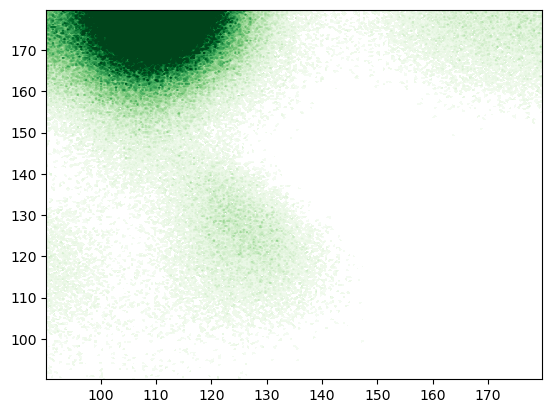

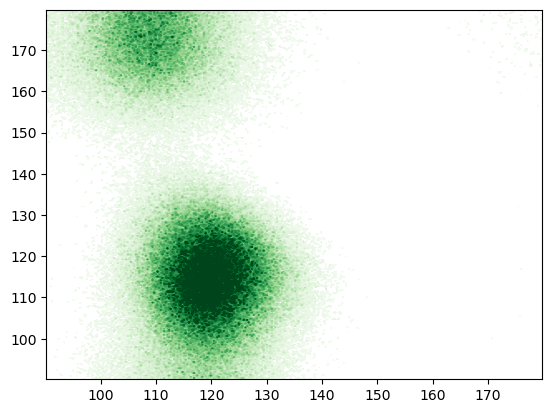

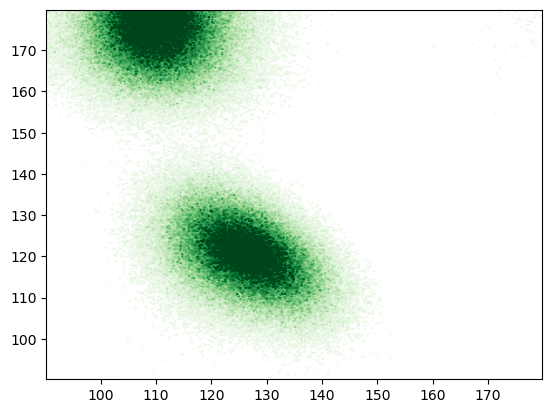

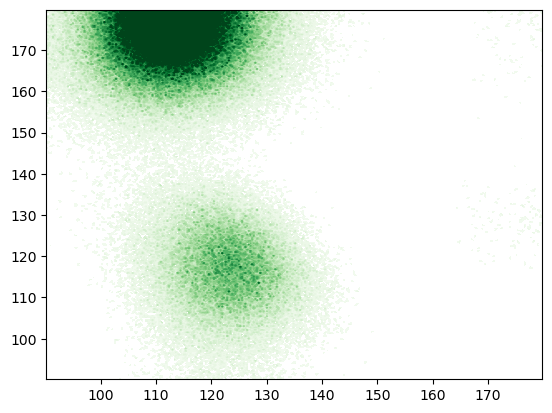

In [68]:
pyemma.plots.plot_density(D_APO_dihedral_50_corr,D_APO_dihedral2_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(C_APO_dihedral_50_corr,C_APO_dihedral2_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(E_APO_dihedral_50_corr,E_APO_dihedral2_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(S_APO_dihedral_50_corr,S_APO_dihedral2_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
 {'mappable': <matplotlib.contour.QuadContourSet at 0x7fc621a3f340>})

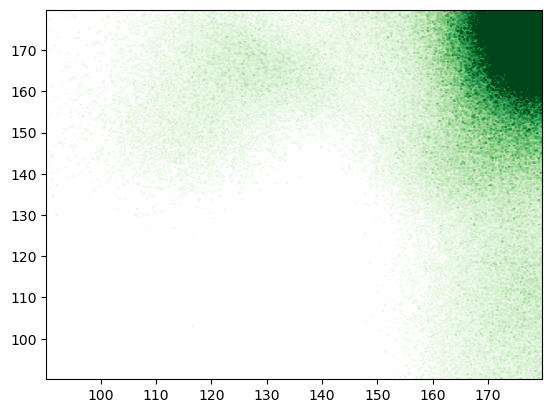

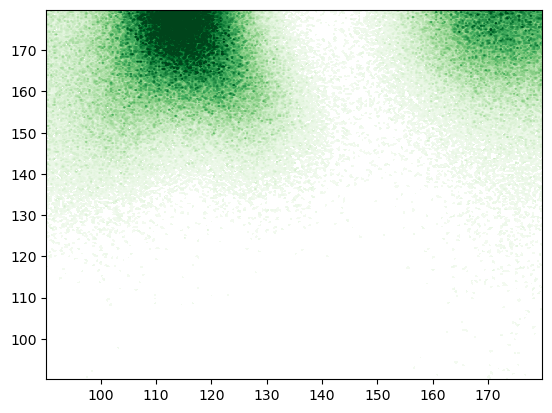

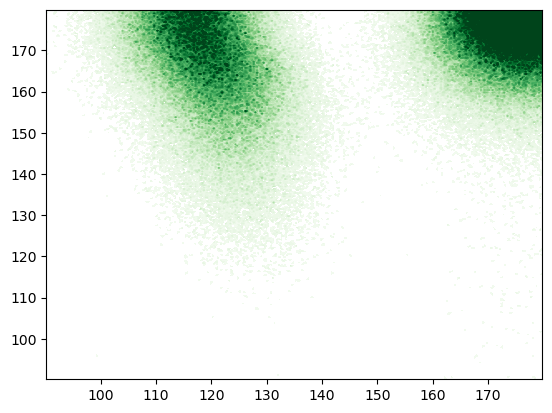

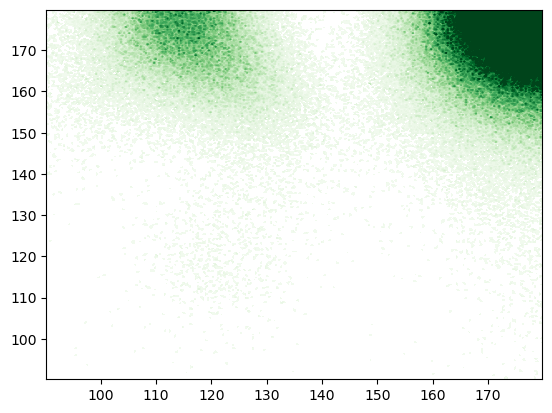

In [69]:
pyemma.plots.plot_density(D_APO_dihedral2_50_corr,D_APO_dihedral3_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(C_APO_dihedral2_50_corr,C_APO_dihedral3_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(E_APO_dihedral2_50_corr,E_APO_dihedral3_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
pyemma.plots.plot_density(S_APO_dihedral2_50_corr,S_APO_dihedral3_50_corr,cmap='Greens',nbins=300,vmin=0,vmax=0.0001,cbar=False)
